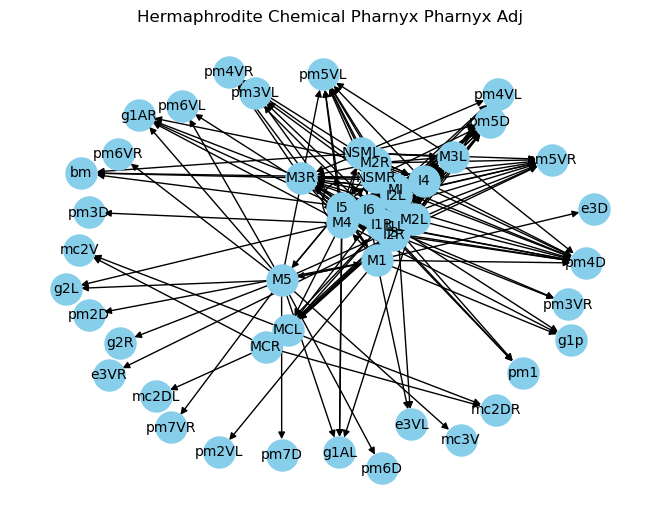

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = r'D:\Complex Systems Project\Data Sets\FILTERED DATA\Herm_Pharynx_Pharynx.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', header=0, index_col=0)

G = nx.DiGraph()
for source in df.index:
    for target in df.columns:
        if df.loc[source, target] == 1:
            G.add_edge(source, target)

pos = nx.spring_layout(G) 
node_labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
plt.title('Hermaphrodite Chemical Pharnyx Pharnyx Adj')
plt.show()

In [3]:
#Degree of each node in the given network

degrees = dict(G.degree())
for node, degree in degrees.items():
    print(f"Node {node}: Degree {degree}")

Node I1L: Degree 19
Node I2L: Degree 22
Node I3: Degree 22
Node I5: Degree 30
Node I6: Degree 17
Node M2L: Degree 17
Node M3L: Degree 16
Node M3R: Degree 17
Node MCL: Degree 8
Node MCR: Degree 6
Node MI: Degree 21
Node NSML: Degree 21
Node pm1: Degree 3
Node pm3VL: Degree 3
Node pm4D: Degree 12
Node pm4VL: Degree 7
Node I1R: Degree 24
Node I2R: Degree 26
Node M1: Degree 25
Node M2R: Degree 12
Node NSMR: Degree 20
Node pm3D: Degree 1
Node pm3VR: Degree 2
Node pm4VR: Degree 5
Node pm5D: Degree 11
Node pm5VR: Degree 10
Node I4: Degree 21
Node M4: Degree 23
Node pm5VL: Degree 10
Node e3VL: Degree 2
Node e3VR: Degree 1
Node M5: Degree 16
Node pm6VL: Degree 2
Node g1AL: Degree 4
Node g1AR: Degree 5
Node g1p: Degree 3
Node bm: Degree 4
Node pm2D: Degree 1
Node pm2VL: Degree 1
Node e3D: Degree 1
Node g2L: Degree 2
Node pm6D: Degree 1
Node pm6VR: Degree 1
Node pm7D: Degree 1
Node pm7VR: Degree 1
Node mc3V: Degree 1
Node g2R: Degree 1
Node mc2DR: Degree 2
Node mc2V: Degree 2
Node mc2DL: Degree 1

In [5]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

for node in G.nodes():
    print(f"Node {node}: In-Degree = {in_degrees[node]}, Out-Degree = {out_degrees[node]}")

Node I1L: In-Degree = 4, Out-Degree = 15
Node I2L: In-Degree = 6, Out-Degree = 16
Node I3: In-Degree = 7, Out-Degree = 15
Node I5: In-Degree = 11, Out-Degree = 19
Node I6: In-Degree = 6, Out-Degree = 11
Node M2L: In-Degree = 7, Out-Degree = 10
Node M3L: In-Degree = 11, Out-Degree = 5
Node M3R: In-Degree = 12, Out-Degree = 5
Node MCL: In-Degree = 6, Out-Degree = 2
Node MCR: In-Degree = 3, Out-Degree = 3
Node MI: In-Degree = 6, Out-Degree = 15
Node NSML: In-Degree = 10, Out-Degree = 11
Node pm1: In-Degree = 3, Out-Degree = 0
Node pm3VL: In-Degree = 3, Out-Degree = 0
Node pm4D: In-Degree = 12, Out-Degree = 0
Node pm4VL: In-Degree = 7, Out-Degree = 0
Node I1R: In-Degree = 4, Out-Degree = 20
Node I2R: In-Degree = 7, Out-Degree = 19
Node M1: In-Degree = 7, Out-Degree = 18
Node M2R: In-Degree = 3, Out-Degree = 9
Node NSMR: In-Degree = 10, Out-Degree = 10
Node pm3D: In-Degree = 1, Out-Degree = 0
Node pm3VR: In-Degree = 2, Out-Degree = 0
Node pm4VR: In-Degree = 5, Out-Degree = 0
Node pm5D: In-D

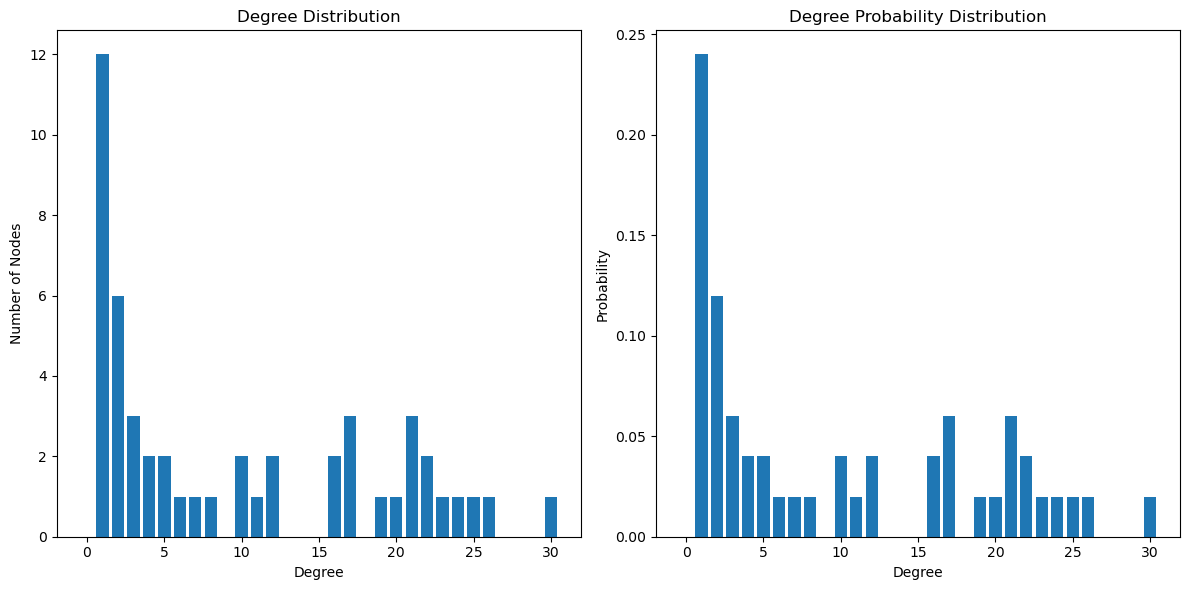

Hubs (Nodes with Degree >= 15): ['I1L', 'I2L', 'I3', 'I5', 'I6', 'M2L', 'M3L', 'M3R', 'MI', 'NSML', 'I1R', 'I2R', 'M1', 'NSMR', 'I4', 'M4', 'M5']


In [6]:
degree_sequence = [d for n, d in G.degree()]
degree_count = nx.degree_histogram(G)

# Calculate the probability of each degree
total_nodes = len(G.nodes())
degree_probability = [count / total_nodes for count in degree_count]

# Plot the degree distribution (number of nodes vs. degree)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(len(degree_count)), degree_count, width=0.8, align='center')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')

# Plot the degree distribution (probability of each degree vs. degree)
plt.subplot(122)
plt.bar(range(len(degree_probability)), degree_probability, width=0.8, align='center')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Probability Distribution')

plt.tight_layout()
plt.show()

# Identify hubs (nodes with high degree)
threshold_degree = 15  # Set a threshold degree value to identify hubs
hubs = [node for node, degree in G.degree() if degree >= threshold_degree]
print(f'Hubs (Nodes with Degree >= {threshold_degree}): {hubs}')


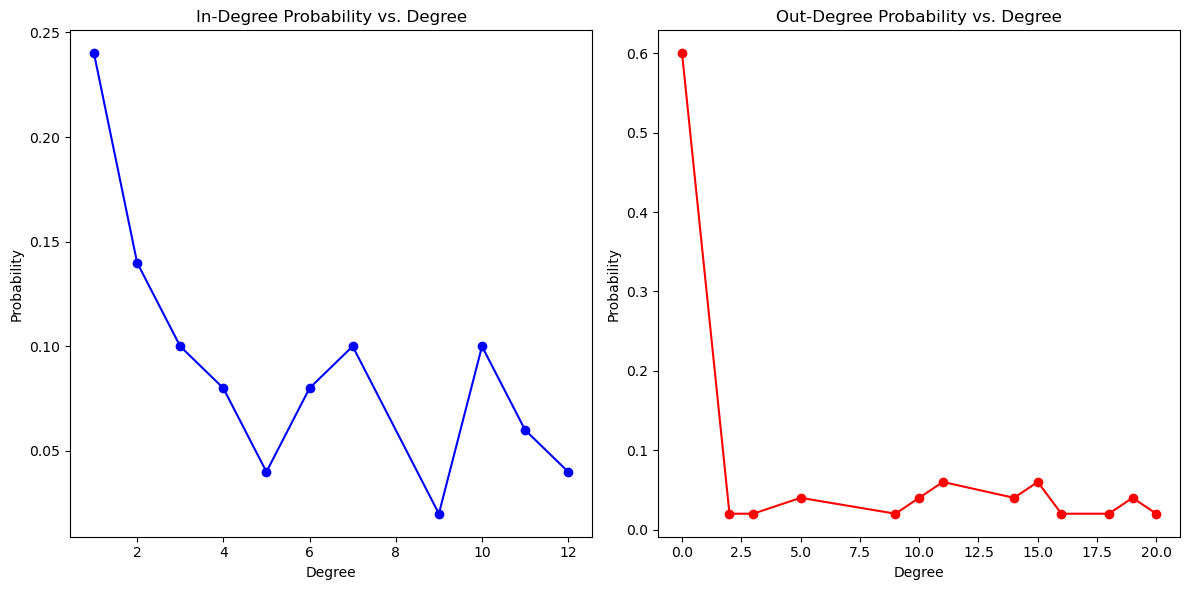

In [11]:
from collections import Counter

in_degree_sequence = [d for n, d in G.in_degree()]
out_degree_sequence = [d for n, d in G.out_degree()]

# Get unique degrees and their counts
unique_in_degrees, in_degree_counts = zip(*sorted(Counter(in_degree_sequence).items()))
unique_out_degrees, out_degree_counts = zip(*sorted(Counter(out_degree_sequence).items()))

total_nodes = len(G.nodes())
in_degree_prob = [count / total_nodes for count in in_degree_counts]
out_degree_prob = [count / total_nodes for count in out_degree_counts]

# Plot in-degree probability vs. degree
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(unique_in_degrees, in_degree_prob, marker='o', linestyle='-', color='blue')
plt.title("In-Degree Probability vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Probability")

# Plot out-degree probability vs. degree
plt.subplot(1, 2, 2)
plt.plot(unique_out_degrees, out_degree_prob, marker='o', linestyle='-', color='red')
plt.title("Out-Degree Probability vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

Calculating best minimal value for power law fit


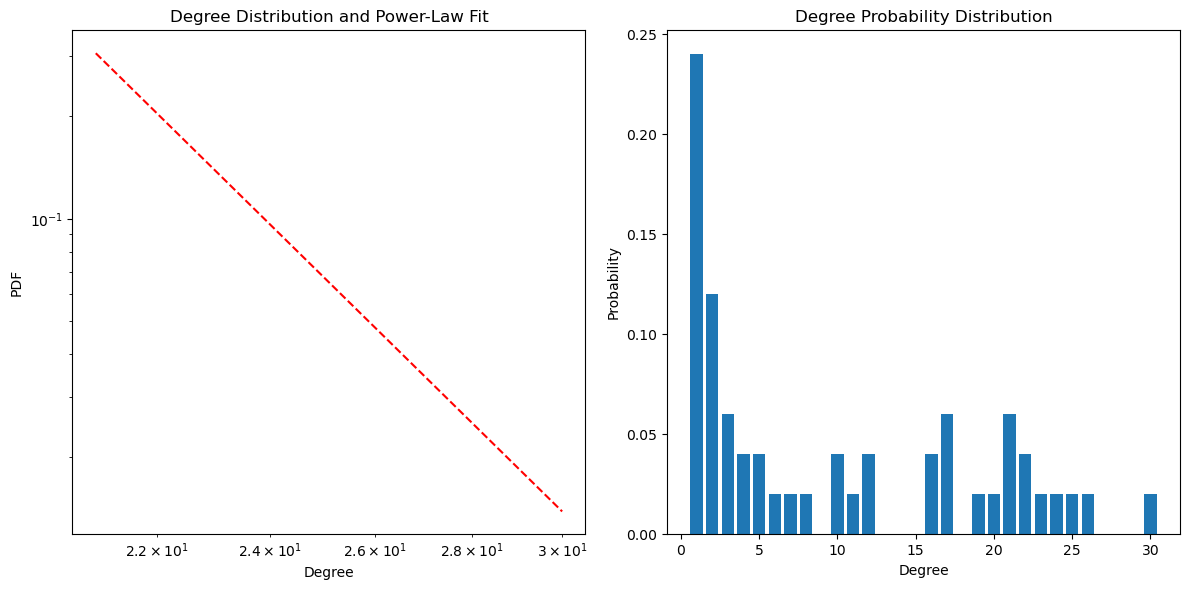

The degree distribution is more likely a fat-tailed power-law distribution.


In [14]:
import powerlaw

fit = powerlaw.Fit(degree_sequence, discrete=True)

# Check the goodness of fit using the Kolmogorov-Smirnov (KS) test
ks_test_result = fit.distribution_compare('power_law', 'exponential')

# Plot the degree distribution (Empirical Data)
plt.figure(figsize=(12, 6))
plt.subplot(121)
fit.plot_pdf(color='b', linewidth=2, label='Empirical Data')
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Power-Law Fit')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.title('Degree Distribution and Power-Law Fit')

# Calculate and plot the degree probability distribution
degree_count = {}
total_nodes = len(degree_sequence)
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1
degree_probability = [count / total_nodes for count in degree_count.values()]

plt.subplot(122)
plt.bar(list(degree_count.keys()), degree_probability, width=0.8, align='center')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Probability Distribution')

plt.tight_layout()
plt.show()

if ks_test_result[1] > 0.05:
    print("The degree distribution is more likely a fat-tailed power-law distribution.")
else:
    print("The degree distribution is more likely not fat-tailed.")


In [16]:
#Calculating the cluster coefficient

clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {clustering_coefficient:.4f}")

Average Clustering Coefficient: 0.2912


In [19]:
#Choosing two nodes and finding their shortest path
source_node = input("Enter the source node: ")
target_node = input("Enter the target node: ")


if source_node in G.nodes() and target_node in G.nodes():
    shortest_path = nx.shortest_path(G, source=source_node, target=target_node)
    
    print(f"Shortest path from {source_node} to {target_node}:")
    print(shortest_path)
else:
    print("One or both of the input nodes are not in the graph.")

Enter the source node: M2L
Enter the target node: g2L
Shortest path from M2L to g2L:
['M2L', 'I3', 'M4', 'g2L']


## Community Detection Algorithm

Community 0: {'e3VR', 'M2L', 'bm', 'e3VL', 'g1p', 'pm3VR', 'pm4VL', 'g1AR', 'pm3VL', 'I5', 'M2R', 'M1', 'NSML', 'M3R', 'e3D', 'MI', 'I6', 'I1L', 'pm1', 'I4', 'g1AL', 'I3', 'M3L', 'pm3D', 'pm2D', 'I2L', 'pm5VL', 'NSMR', 'pm2VL', 'pm5VR', 'pm5D', 'I2R', 'M4', 'I1R', 'pm4D', 'pm4VR', 'MCL'}
Community 1: {'MCR', 'mc2V', 'mc2DL', 'mc2DR'}
Community 2: {'pm6VL', 'pm7D', 'g2R', 'pm6VR', 'M5', 'pm6D', 'g2L', 'pm7VR', 'mc3V'}


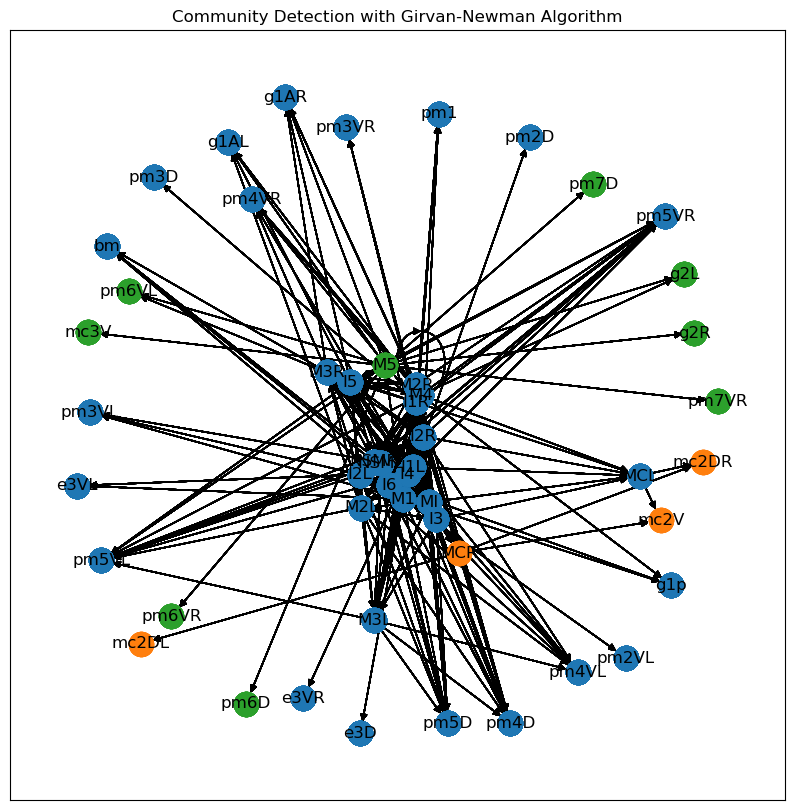

In [22]:
from networkx.algorithms.community import girvan_newman
import itertools

# Apply the Girvan-Newman algorithm for community detection
comp = girvan_newman(G)

# Get the top-level communities after a certain number of splits (e.g., 2)
k = 2
top_level_communities = next(itertools.islice(comp, k-1, k))

for i, community_set in enumerate(top_level_communities):
    print(f"Community {i}: {community_set}")

# Visualize the communities with different colors and labels
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)

for i, community_set in enumerate(top_level_communities):
    for node in community_set:
        nx.draw_networkx_nodes(G, pos, nodelist=community_set, node_color=f"C{i}", label=f"Community {i}")
        nx.draw_networkx_labels(G, pos, labels={node: node})
        nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Community Detection with Girvan-Newman Algorithm")
plt.show()

## Node and Edge Robustness

In [23]:
import random

def assess_robustness(graph, removal_fraction, is_edge_removal=False):
    # Create a copy of the original graph
    original_graph = graph.copy()
    
    # Calculate the number of nodes or edges to remove
    if is_edge_removal:
        num_removals = int(removal_fraction * graph.number_of_edges())
    else:
        num_removals = int(removal_fraction * graph.number_of_nodes())
    
    nodes = list(graph.nodes())
    
    if is_edge_removal:
        edges_to_remove = random.sample(graph.edges(), num_removals)
        graph.remove_edges_from(edges_to_remove)
    else:
        nodes_to_remove = random.sample(nodes, num_removals)
        graph.remove_nodes_from(nodes_to_remove)

    # Calculate the largest strongly connected component size
    largest_strongly_connected_component = max(nx.strongly_connected_components(graph), key=len)
    
    # Calculate the fraction of nodes or edges that remain in the largest connected component
    robustness = len(largest_strongly_connected_component) / original_graph.number_of_nodes() if is_edge_removal else len(largest_strongly_connected_component) / original_graph.number_of_nodes()
    
    return robustness

# Simulate node removal and assess robustness
node_removal_fraction = 0.1  # Fraction of nodes to remove
node_robustness = assess_robustness(G, node_removal_fraction, is_edge_removal=False)
print(f"Node Robustness: {node_robustness:.4f}")

# Simulate edge removal and assess robustness
edge_removal_fraction = 0.1  # Fraction of edges to remove
edge_robustness = assess_robustness(G, edge_removal_fraction, is_edge_removal=False)
print(f"Edge Robustness: {edge_robustness:.4f}")


# Inferences:
# - Node Robustness measures the fraction of nodes that remain in the largest connected component
#   after removing a fraction of nodes. A higher value indicates greater resilience to node failures.
# - Edge Robustness measures the fraction of nodes that remain in the largest connected component
#   after removing a fraction of edges. A higher value indicates greater resilience to edge failures.
# - Assessing robustness helps us understand how well the network tolerates node or edge removal,
#   which is valuable for network design, fault tolerance, and security considerations.


Node Robustness: 0.3200
Edge Robustness: 0.3111


Node Robustness: 0.3200

This means that we can remove approximately 32.00% of the nodes from the graph before the largest strongly connected component becomes disconnected. In other words, the network remains strongly connected even after losing about 32.00% of its nodes.

Edge Robustness: 0.3111

This value indicates that you can remove approximately 31.11% of the edges from the graph before the largest strongly connected component becomes disconnected. The network remains strongly connected even after losing about 31.11% of its edges. 

Inferences:
The network is relatively robust to both node and edge removal, as a significant portion of nodes and edges can be removed without causing a loss of connectivity in the largest strongly connected component. The network structure likely contains redundancy and alternative pathways that allow it to maintain connectivity even when some nodes or edges are removed

### Centrality measures

In [28]:
# Calculate different centrality measures
degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

for node in G.nodes():
    print(f"Node {node}:")
    print(f"Degree Centrality: {degree_centrality.get(node, 0):.4f}")
    print(f"In-Degree Centrality: {in_degree_centrality.get(node, 0):.4f}")
    print(f"Out-Degree Centrality: {out_degree_centrality.get(node, 0):.4f}")
    print(f"Closeness Centrality: {closeness_centrality.get(node, 0):.4f}")
    print(f"Betweenness Centrality: {betweenness_centrality.get(node, 0):.4f}")
    print(f"Eigenvector Centrality: {eigenvector_centrality.get(node, 0):.4f}")
    print("\n")


Node I1L:
Degree Centrality: 0.4000
In-Degree Centrality: 0.1000
Out-Degree Centrality: 0.3000
Closeness Centrality: 0.1690
Betweenness Centrality: 0.0099
Eigenvector Centrality: 0.1077


Node I2L:
Degree Centrality: 0.5250
In-Degree Centrality: 0.1500
Out-Degree Centrality: 0.3750
Closeness Centrality: 0.2012
Betweenness Centrality: 0.0188
Eigenvector Centrality: 0.1784


Node I3:
Degree Centrality: 0.4500
In-Degree Centrality: 0.1500
Out-Degree Centrality: 0.3000
Closeness Centrality: 0.2012
Betweenness Centrality: 0.0146
Eigenvector Centrality: 0.1441


Node I5:
Degree Centrality: 0.6000
In-Degree Centrality: 0.2000
Out-Degree Centrality: 0.4000
Closeness Centrality: 0.2224
Betweenness Centrality: 0.0366
Eigenvector Centrality: 0.2206


Node I6:
Degree Centrality: 0.4250
In-Degree Centrality: 0.1500
Out-Degree Centrality: 0.2750
Closeness Centrality: 0.2012
Betweenness Centrality: 0.0226
Eigenvector Centrality: 0.1855


Node M3L:
Degree Centrality: 0.3250
In-Degree Centrality: 0.225

Degree Centrality:

Significance: Nodes with high degree centrality are well-connected to other nodes. In directed graphs, degree centrality can be split into in-degree and out-degree centrality, indicating the number of incoming and outgoing edges, respectively.
Use Cases: Identifying popular nodes, potential hubs, or nodes with high influence.

In-Degree and Out-Degree Centrality:

Significance: In-degree centrality measures the number of incoming edges to a node, while out-degree centrality measures the number of outgoing edges. Nodes with high in-degree may be seen as "receivers" of information, while those with high out-degree may be seen as "sources" of information.
Use Cases: Identifying nodes that attract attention (in-degree) or nodes that disseminate information (out-degree).

Closeness Centrality:

Significance: Closeness centrality measures how close a node is to all other nodes in the network. Nodes with high closeness centrality are easily reachable from other nodes.
Use Cases: Identifying nodes that can quickly interact or exchange information with other nodes.

Betweenness Centrality:

Significance: Betweenness centrality identifies nodes that act as bridges or intermediaries in the network. It quantifies the number of shortest paths passing through a node.
Use Cases: Identifying nodes critical for maintaining network connectivity or facilitating communication between other nodes.

Eigenvector Centrality:

Significance: Eigenvector centrality measures the influence of a node based on the influence of its neighbors. Nodes with high eigenvector centrality are connected to other well-connected nodes.
Use Cases: Identifying nodes that are influential due to their connections with other influential nodes.

Top 1 nodes with highest centrality measures:
Degree Centrality: ['I5']
In-Degree Centrality: ['NSML']
Out-Degree Centrality: ['I5']
Closeness Centrality: ['pm5D']
Betweenness Centrality: ['M1']
Eigenvector Centrality: ['pm5D']


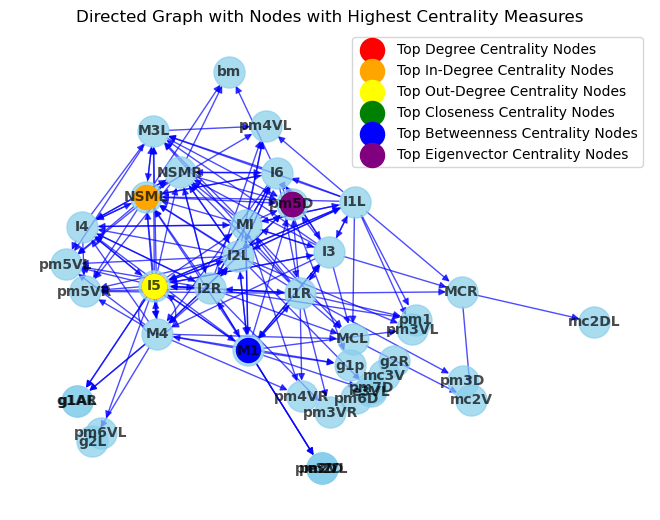

In [34]:
def get_nodes_with_highest_centrality(centrality_dict, top_n=5):
    sorted_nodes = sorted(centrality_dict, key=centrality_dict.get, reverse=True)
    return sorted_nodes[:top_n]

# Specify the number of top nodes to retrieve
top_n_nodes = 1

# Get nodes with highest centrality for each measure
top_degree_nodes = get_nodes_with_highest_centrality(degree_centrality, top_n=top_n_nodes)
top_in_degree_nodes = get_nodes_with_highest_centrality(in_degree_centrality, top_n=top_n_nodes)
top_out_degree_nodes = get_nodes_with_highest_centrality(out_degree_centrality, top_n=top_n_nodes)
top_closeness_nodes = get_nodes_with_highest_centrality(closeness_centrality, top_n=top_n_nodes)
top_betweenness_nodes = get_nodes_with_highest_centrality(betweenness_centrality, top_n=top_n_nodes)
top_eigenvector_nodes = get_nodes_with_highest_centrality(eigenvector_centrality, top_n=top_n_nodes)

# Print the nodes with highest centrality for each measure
print(f"Top {top_n_nodes} nodes with highest centrality measures:")
print(f"Degree Centrality: {top_degree_nodes}")
print(f"In-Degree Centrality: {top_in_degree_nodes}")
print(f"Out-Degree Centrality: {top_out_degree_nodes}")
print(f"Closeness Centrality: {top_closeness_nodes}")
print(f"Betweenness Centrality: {top_betweenness_nodes}")
print(f"Eigenvector Centrality: {top_eigenvector_nodes}")


# Visualize the network
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='blue', alpha=0.7)

# Highlight nodes with highest centrality measures
nx.draw_networkx_nodes(G, pos, nodelist=top_degree_nodes, node_color='red', label='Top Degree Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_in_degree_nodes, node_color='orange', label='Top In-Degree Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_out_degree_nodes, node_color='yellow', label='Top Out-Degree Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_closeness_nodes, node_color='green', label='Top Closeness Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_betweenness_nodes, node_color='blue', label='Top Betweenness Centrality Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=top_eigenvector_nodes, node_color='purple', label='Top Eigenvector Centrality Nodes')


plt.legend()
plt.title("Directed Graph with Nodes with Highest Centrality Measures")
plt.show()